Практична робота №3

Студента групи МІТ-31 (підгрупа 2)

Фуркала Олександра Олександровича

Training set size: 800
Test set size: 200
Mean Squared Error: 85.02525277798475
R-squared: 0.9995202644720981


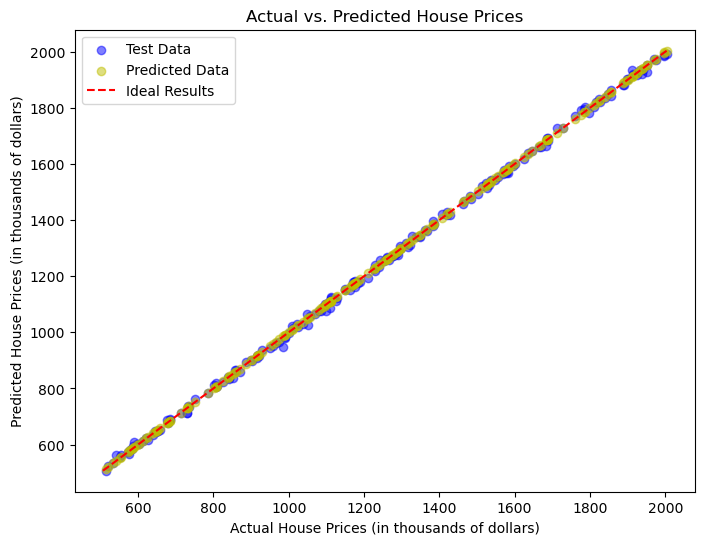

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

#Task 1
np.random.seed(0)
living_area = np.random.uniform(50, 200, 1000)
num_bedrooms = np.random.randint(1, 6, 1000)
distance_to_center = np.random.uniform(1, 20, 1000)
error = np.random.normal(0, 10, 1000)  
house_price = 10 * living_area + 5 * num_bedrooms - 2 * distance_to_center + error
data = pd.DataFrame({
    "Living Area": living_area,
    "Number of Bedrooms": num_bedrooms,
    "Distance to City Center": distance_to_center,
    "House Price (in thousands of dollars)": house_price
})
data.to_csv('full_data.csv')

#Task 2
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
#Використовується для скидання індексу.
#Скидаючи індекс, ми переназначаємо новий індекс навчальним і тестовим наборам, починаючи з 0, 
#що полегшує роботу з цими підмножинами.
#Аргумент drop=True вказує, що старий індекс (успадкований від оригінального DataFrame) має бути видалено.
print("Training set size:", len(train_data))
print("Test set size:", len(test_data))

#Task 3
model = LinearRegression()
X_train = train_data[["Living Area", "Number of Bedrooms", "Distance to City Center"]]
y_train = train_data["House Price (in thousands of dollars)"]
X_test = test_data[["Living Area", "Number of Bedrooms", "Distance to City Center"]]
y_test = test_data["House Price (in thousands of dollars)"]
model.fit(X_train, y_train)

#Task 4
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

#Task 5
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='b', label='Test Data', marker='o')
plt.scatter(y_test, y_test, alpha=0.5, c='y', label='Predicted Data', marker='o')
#"alpha" — параметр, який контролює прозорість точок на діаграмі розсіювання.
#Він приймає значення від 0 до 1, де 0 означає повністю прозорий (невидимий),
#а 1 означає повністю непрозорий (зовсім не прозорий).
#"c" = colour, колір
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', c='r', label='Ideal Results')
plt.xlabel('Actual House Prices (in thousands of dollars)')
plt.ylabel('Predicted House Prices (in thousands of dollars)')
plt.title('Actual vs. Predicted House Prices')
plt.legend()
plt.show()

#### Task 6:
Модель лінійної регресії є перспективною для прогнозування цін на житло на основі цих даних. Проте є можливості для вдосконалення, про що свідчить MSE. Подальше вдосконалення моделі або вивчення більш складних методів регресії може підвищити точність прогнозування. Для цього аналізу використовуються синтетичні дані, та тому реальні дані можуть спричинити деякі додаткові труднощі та проблеми. Незважаючи на це, модель служить відправною точкою для прогнозування ціни на нерухомість і може бути налаштована для практичних застосувань.